<p align="left">
  <img src="./logo_UTN.svg" />
</p>


# **Teoría de Circuitos II - R4001 - 2023**
## Trabajo Semanal 10
### Autor: Bruno Glecer

# Consignas

<p align="left">
  <img src="./consigna_1.png" width=1000/>
</p>


<p align="left">
  <img src="./consigna_2.png" width=1000/>
</p>

# Problema 1

## Resolución en papel

Para resolver este ejercicio fue critico el uso de remociones parciales, para poder asignarle a cada tanque RC su frecuencia resonante correspondiente.

<p align="left">
  <img src="./ej1_1.png" width=600/>
</p>

<p align="left">
  <img src="./ej1_2.png" width=600/>
</p>

<p align="left">
  <img src="./ej1_3.png" width=600/>
</p>

## Verificación con pytc2

Comenzamos usando las funciones del modulo de remoción de la libreria pytc2 para operar sobre la transferencia hasta llegar a una impedancia nula

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sympy as sp


from pytc2.remociones import remover_polo_dc, remover_polo_infinito
from pytc2.remociones import remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma

from pytc2.sintesis_dipolo import cauer_RC, foster, foster_zRC2yRC
from pytc2.dibujar import dibujar_cauer_RC_RL, dibujar_foster_derivacion, dibujar_foster_serie
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown
from pytc2.sintesis_dipolo import cauer_RC
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_tanque_RC_derivacion, dibujar_espacio_derivacion, Capacitor, Resistor, Inductor
from schemdraw.elements import  Resistor, ResistorIEC, Capacitor, Inductor, Line, Dot, Gap, Arrow


s = sp.symbols('s', complex=True)

ZZ = (s**2 + 6*s + 8)/(s**2 + 4*s + 3)


ZZ2, Z1 = remover_valor_en_infinito(ZZ, sigma_zero=6)

YY3, Krc1, ZR1, ZC1 = remover_polo_sigma(1/ZZ2, '6', isImpedance=False) #Escribo los numeros como strings para que las funciones internas de scipy puedan operar simbolicamente

ZZ4, Z2 = remover_valor_en_infinito(1/YY3, sigma_zero='7/2')

YY5, Krc2, ZR2, ZC2 = remover_polo_sigma(1/ZZ4, '7/2', isImpedance=False)

ZZ6, Z3 = remover_valor_en_infinito(1/YY5)

ZZ6

0

Continuamos conviritiendo los valores encontrados a un esquematico utilizando el modulo de dibujo

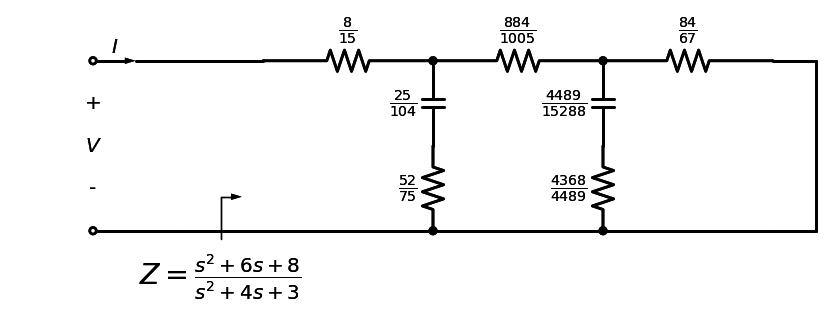

In [2]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, Z1)

d = dibujar_tanque_RC_derivacion(d, ZR1, ZC1)

d = dibujar_elemento_serie(d, Resistor, Z2)

d = dibujar_tanque_RC_derivacion(d, ZR2, ZC2)

d = dibujar_elemento_serie(d, Resistor, Z3)

#Copiado de dibujar_foster_serie() para realizar el 
d += Line().right().length(d.unit*.25)
d += Line().down()
d += Line().left().length(d.unit*.25)

display(d)

Los valores encontrados utilizando la libreria pytc2 fueron exactamente los mismos que fueron obtenidos realizando la sintesis analitica en papel.

# Problema 2

## Resolución en papel

Este problema introdujo la complejidad de ubicar polos que se encuentren por afuera de los ejes del plano s. Esta complejidad no nos permite de hacer uso de las herramientas graficas para facilitar este problema, se debe realizar analiticamente. Es posible realizar la sintesis solamente realizando remociones en cero y en infinito.


<p align="left">
  <img src="./ej2_1.png" width=600/>
</p>


<p align="left">
  <img src="./ej2_3.png" width=500/>
</p>

## Verificación con pytc2

In [3]:

ZZ = (s**2 + s + 1)/((s**2 + 2*s + 5)*(s + 1))


YY2, YC1 = remover_polo_infinito(1/ZZ)

YY3, YR1 = remover_valor_en_infinito(YY2)

ZZ4, ZL1 = remover_polo_infinito(1/YY3)

ZZ5, ZR2 = remover_valor_en_infinito(ZZ4)

YY6, YC2 = remover_polo_infinito(1/ZZ5)

YY7, YR3 = remover_valor_en_infinito(YY6)

YY7

0

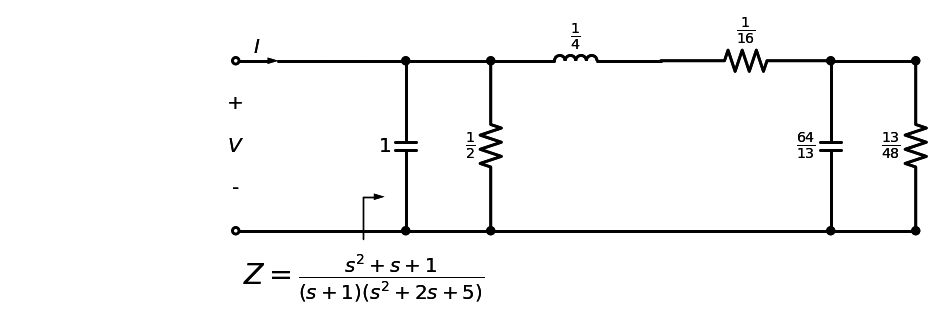

In [4]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, Capacitor, YC1/s)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, Resistor, 1/YR1)

d = dibujar_elemento_serie(d, Inductor, ZL1/s)

d = dibujar_elemento_serie(d, Resistor, ZR2)

d = dibujar_elemento_derivacion(d, Capacitor, YC2/s)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, Resistor, 1/YR3)


display(d)

Obtuvimos el mismo circuito con pytc2